# My first Code

# Use python
# python can be programe in
 -as a structerd langugae
 -as a object oriented language(by define class,constarctor ,object,extractra)

 ## mostly we use the jupyter lab

In [1]:
y=2;
x=6;
y=x+y;
print (y);

8


# Strat the Mashin learning 

## By an simple example 
### throught the example we will:
  -look at the big picture the big picture
  -how to get the data 
  -discover and vissualized data-->

## please import real data
## there some data in clude the 


# In this class, we will use the California Housing Prices from the StatLib repository 

In [2]:
import os
import tarfile
from six.moves import urllib

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
print(HOUSING_PATH)
print(HOUSING_URL)

datasets\housing
https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz


In [4]:
def fetch_housing_data(HOUSING_URL1, HOUSING_PATH1):
    housing_url=HOUSING_URL1
    housing_path=HOUSING_PATH1 
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    print(tgz_path)
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
fetch_housing_data(HOUSING_URL,HOUSING_PATH)

datasets\housing\housing.tgz


In [7]:
housing = load_housing_data(HOUSING_PATH)  # housing variable here is a "pandaas data frame"

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [10]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


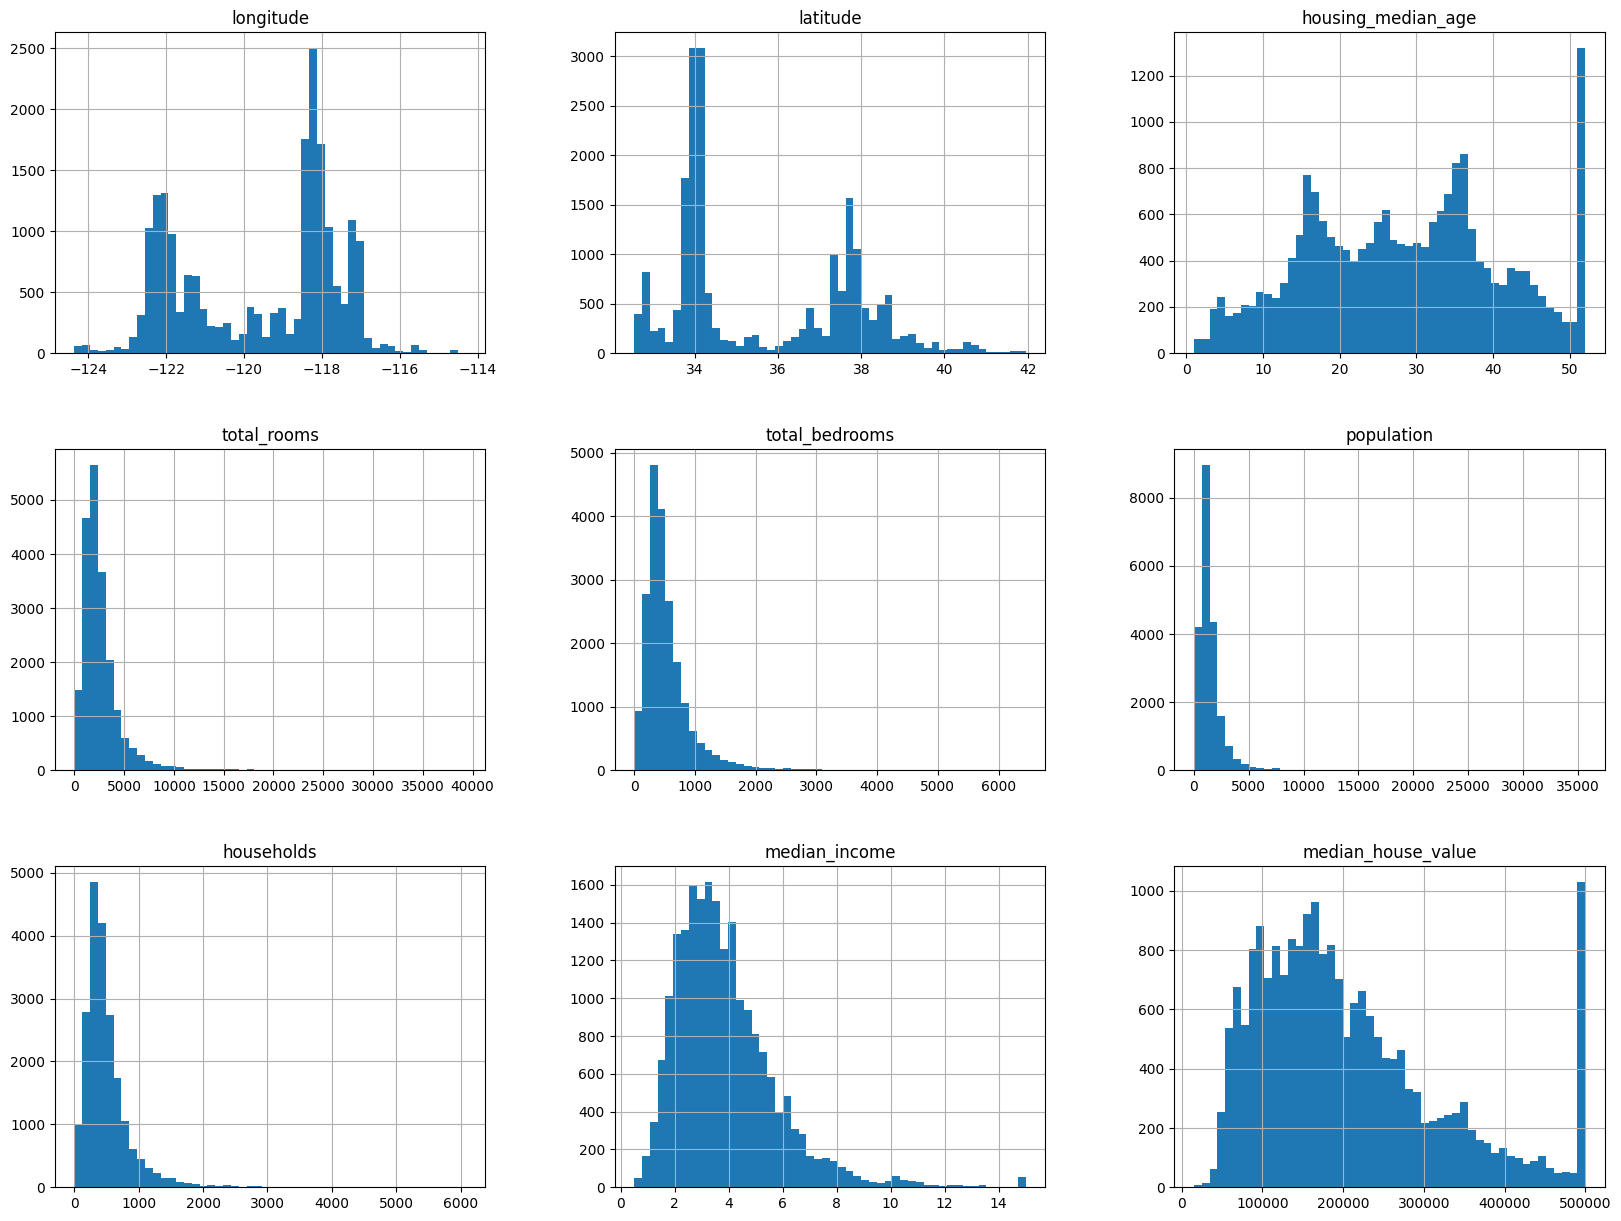

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins =50,figsize=(20,15))
plt.show()

In [13]:
import numpy as np

def split_train_test(data,test_ration):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ration)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]  # Getting the indices of the shuffled set from test_set_size to end of the data 
    return data.iloc[train_indices], data.iloc[test_indices] 

In [14]:
train_set,test_Set=split_train_test(housing, 0.2)

In [15]:
len(train_set)

16512

In [16]:
len(test_Set)

4128

In [17]:
train_set , test_set =split_train_test(housing, 0.2)

In [18]:
len(test_set)

4128

In [19]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14111,-117.10,32.74,14.0,2361.0,601.0,1831.0,526.0,1.6102,93400.0,NEAR OCEAN
3087,-118.87,35.65,33.0,1504.0,325.0,584.0,223.0,3.4792,94600.0,INLAND
8824,-118.36,34.09,36.0,1616.0,465.0,773.0,429.0,2.6000,313600.0,<1H OCEAN
14238,-117.09,32.71,12.0,3375.0,945.0,2357.0,808.0,1.5000,106300.0,NEAR OCEAN
16148,-122.47,37.78,52.0,2042.0,378.0,1153.0,408.0,4.1856,404700.0,NEAR BAY


In [20]:
train_set , test_set = split_train_test(housing, 0.2)

In [21]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9406,-122.53,37.88,36.0,2688.0,485.0,1064.0,449.0,4.4583,308600.0,NEAR BAY
9097,-118.61,34.73,25.0,3080.0,587.0,1558.0,510.0,5.0839,156700.0,INLAND
1869,-119.95,38.95,21.0,2046.0,580.0,952.0,353.0,1.7245,92200.0,INLAND
1544,-121.93,37.73,23.0,2564.0,347.0,1043.0,351.0,6.2048,275000.0,<1H OCEAN
4989,-118.31,34.00,47.0,1551.0,362.0,1329.0,322.0,1.9792,116400.0,<1H OCEAN


In [22]:
import numpy as np
def split_train_test(data, test_ration):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]   # Getting the indices of the shuffled set from 0 to test_set_size 
    train_indices = shuffled_indices[test_set_size:]  # Getting the indices of the shuffled set from test_set_size to end of the data 
    return data.iloc[train_indices], data.iloc[test_indices] 

In [23]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9406,-122.53,37.88,36.0,2688.0,485.0,1064.0,449.0,4.4583,308600.0,NEAR BAY
9097,-118.61,34.73,25.0,3080.0,587.0,1558.0,510.0,5.0839,156700.0,INLAND
1869,-119.95,38.95,21.0,2046.0,580.0,952.0,353.0,1.7245,92200.0,INLAND
1544,-121.93,37.73,23.0,2564.0,347.0,1043.0,351.0,6.2048,275000.0,<1H OCEAN
4989,-118.31,34.00,47.0,1551.0,362.0,1329.0,322.0,1.9792,116400.0,<1H OCEAN


In [24]:
from zlib import crc32
def test_set_check(identifier, test_ration):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ration*2**32
def split_train_test_by_id(data, test_ration, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ration))
    return data.loc[~in_test_set], data.loc[in_test_set] 


In [25]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Unfortunatley our housing data has no unique identifire 
    - One option is to use the inex as an identifier 
        - Make sure that the new data are appended at the end of the file 
        - Make sure that no data are deleted 

In [26]:
housing_with_id = housing.reset_index()

In [27]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [29]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [30]:
housing_with_id["id"] = housing["longitude"]*1000+housing["latitude"]

In [31]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [32]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [33]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


### Scikit-Learn provides few functions to slpit tje training set and test set. 

In [34]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [35]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


- So far we were looking at the random splitting 
- Consider you pick 1000 people 
    - if you pick randomly there is high chance that you get 500 female and 500 male 
    - if you consider how the population is in US 51.3% female and 48.7% male 
        - best way of pciking the sample is then to pick 513 female and 487 male 
## This way of sampling is called the "stratified sampling" 
    - in here population is devided in to subgroups calles "strata" 

### How this applied to our case? 
    - May be from an expert or may be indepth analysis of data says you that the "median income"is a very importent attribute to predic the "median house pricing"

In [36]:
housing["income_cat"] = pd.cut(housing["median_income"],
                             bins =[0.,1.5,3.0,4.5,6.,np.inf],
                             labels=[1,2,3,4,5])

<Axes: >

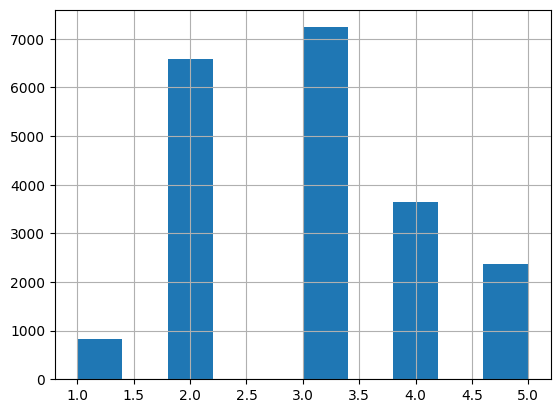

In [37]:
housing["income_cat"].hist()

In [38]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


#### Stratified sampling based on the income category 

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [40]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

### Let's delete the income_cat from the data so it goes to the origninal state 

In [41]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

### Assignment has a good chunck of marks allocated to EDA  
     #### Assignment --> Theory behind the algorithm --> Present the thory properly in your writin ****
     
### Put your test set aside and only use the training set for EDA
        - Take the part of the data set for EDA (Exploration set) if the data set is very large 

In [42]:
housing_tr =strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

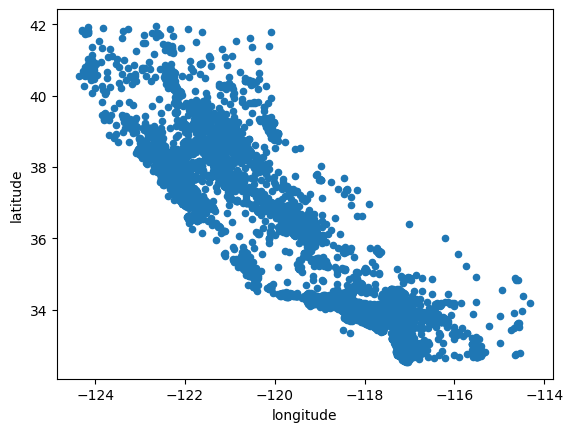

In [43]:
housing_tr.plot(kind="scatter",x="longitude",y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

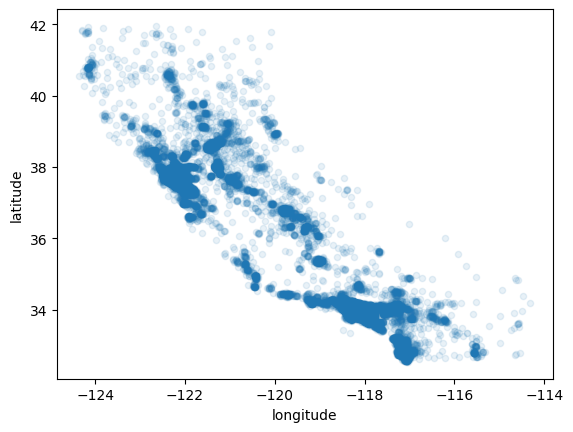

In [44]:
housing_tr.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

## let's look at the housing price 

<Axes: xlabel='longitude', ylabel='latitude'>

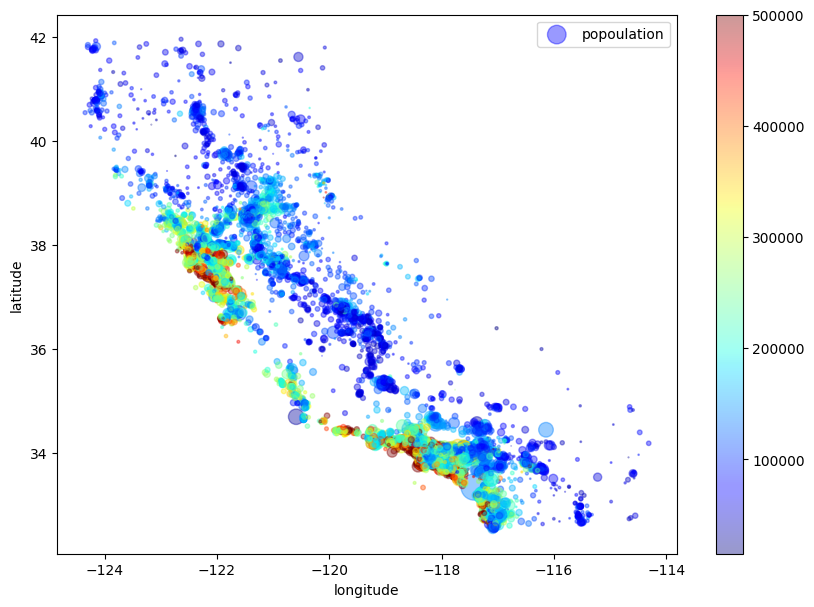

In [45]:
housing_tr.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
               s=housing_tr["population"]/100, label="popoulation" , figsize=(10,7),
               c=housing_tr["median_house_value"],cmap=plt.get_cmap("jet"),colorbar=True,
               )
             

- Our objective is to predict the housing price 
    - What attributes are importent in doing so 
    - To do that we have to see the "Corrilation" between the other attributes and the median_house_value 
        - Corrielation coefficient only measure the linear relationship 